# Lab 5.6a

Goals:

* Produce visualizations of two-variable functions using a color map.
* Draw vectors on an axis.
* Use gradient ascent to find local maximums.
* Discover the relationship between starting points, parameters, and the output of gradient ascent.





Libraries!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

You'll be working with a function whose maximums and minimums are harder to solve for numerically.  Pick one of the functions below to work with.  You should pick a different function than your groupmates.

In [2]:
def f1(x,y):
  return np.sin(x)+np.sin(2*x+y)

def f2(x,y):
  return np.cos(x)+np.sin(x-2*y)

def f3(x,y):
  return np.sin(x)+np.cos(3*x+y)

def f4(x,y):
  return np.cos(y)+np.sin(x+3*y)

def f5(x,y):
  return np.cos(x)+np.sin(2*x+y)


# Questions
Write answers to these questions using code and text blocks.  When you are satisfied, download and submit an .ipynb file to Canvas.

## Q1

* Produce a nice colormapped diagram of your function on the domain $-6\leq x\leq 6$ and $-4\leq y\leq 4$.  Make sure you label your diagram, and correctly scale and orient your axes.

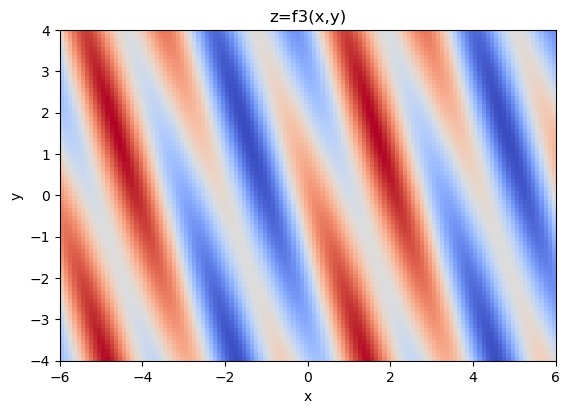

In [4]:
xvalues=np.arange(-6,6, 0.1)
yvalues=np.arange(-4,4, 0.1)
x,y=np.meshgrid(xvalues,yvalues)

# I will choose function f3.
z=f3(x,y)

ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

## Q2

* Define a function `df(x,y)` that returns the gradient vector of your function at `(x,y)`.  
* Copy your `ascent()` function from the prelab.
* Pick a point not especially close to a local maximum as an initial guess.
* Produce a visualization of a gradient ascent that approaches a local maximum.  You will need to experiment with `alpha` and `n` to get a nice ascent.
* If your gradient ascent heads outside the graph, feel free to adjust the domain you show.


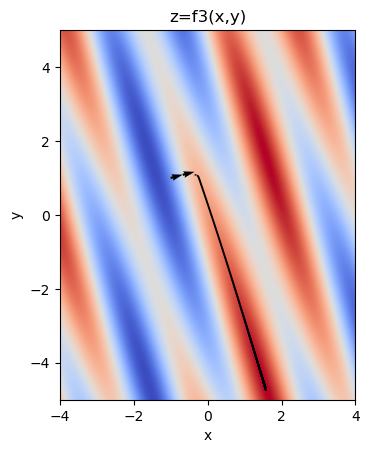

In [12]:
# f3=np.sin(x)+np.cos(3*x+y)
def df3(x,y):
  return (np.cos(x)-3*np.sin(3*x+y), -np.sin(3*x+y))

def ascent(x,y,dg,alpha,n):
  for i in range (n):
    ax.quiver(x,y,alpha*dg(x,y)[0],alpha*dg(x,y)[1],angles='xy',scale_units='xy', scale=1)
    x = x + alpha * dg(x,y)[0]
    y = y + alpha * dg(x,y)[1]
  return (x,y)

xvalues=np.arange(-6,6,0.01)
yvalues=np.arange(-5,5,0.01)
x,y=np.meshgrid(xvalues,yvalues)

z1=f3(x,y)

ax=plt.axes(xlim=[-4,4], ylim=[-5,5])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')

ascent(-1,1,df3,0.1,1000)


ax.imshow(z1, cmap='coolwarm', origin='lower', extent=(-6,6,-5,5))

## Q3

* What downsides are there to using too small an $\alpha$?  Explain in a couple sentences and illustrate with an example.
* What downsides are there to using too large an $\alpha$?  Explain in a couple sentences and illustrate with an example.


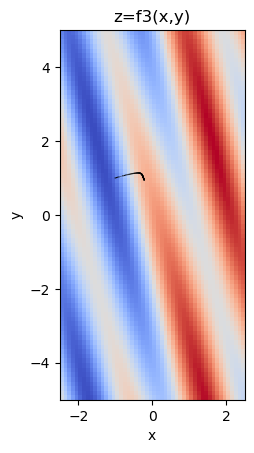

In [15]:
ax=plt.axes(xlim=[-2.5,2.5], ylim=[-5,5])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(-1,1,df3,0.01,100)
ax.imshow(z, cmap='coolwarm', origin='lower', extent=(-6,6,-5,5))
# When alpha is too small, the changes in the for loop is too small.
# Therefore the vector produced is still far away from the maximum and not moving forward.

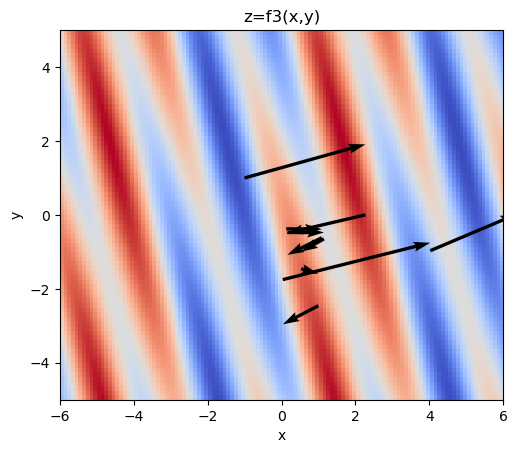

In [20]:
ax=plt.axes(xlim=[-6,6], ylim=[-5,5])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(-1,1,df3,1,30)
ax.imshow(z, cmap='coolwarm', origin='lower', extent=(-6,6,-5,5))
# When alpha is too large, the changes in the for loop is too big.
# Therefore the vector produced might be misdirected, overshooting the maximum value or maybe fail to converge.

## Q4

* What determines which maximum a gradient ascent will approach (assuming a reasonable choice of $\alpha$)?  Can you give examples of two nearby points that approach two different maximums?



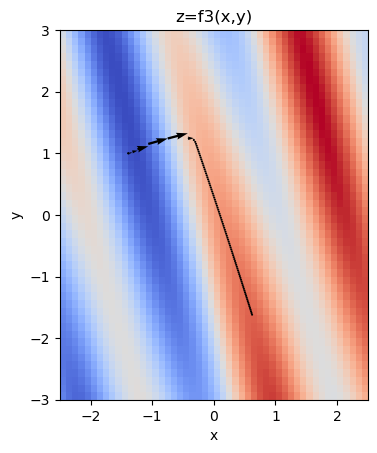

In [47]:
ax=plt.axes(xlim=[-2.5,2.5], ylim=[-3,3])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(-1.39,1,df3,0.1,100)
ax.imshow(z, cmap='coolwarm', origin='lower', extent=(-6,6,-5,5))

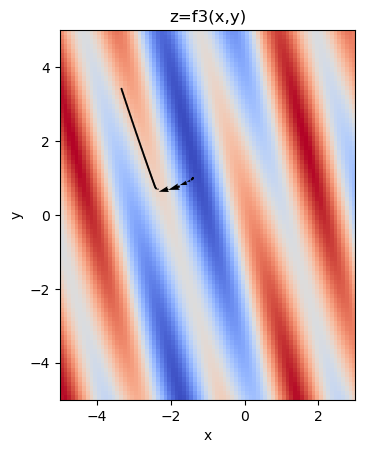

In [46]:
ax=plt.axes(xlim=[-5,3], ylim=[-5,5])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(-1.4,1,df3,0.1,100)
ax.imshow(z, cmap='coolwarm', origin='lower', extent=(-6,6,-5,5))
# In the first one, the point (-1.39,1) is closer to the maximum at (1, -1.75), so it goes to that way.
# In the second case, the point(-1.4,1) is closer to the maximum at (-2.5, 0.5), so it points to another way.
# As we set alpha fixed at 0.1 and n=100, when I changed the x-coordinate of the start guess from -1.39 to -1.4, the choice of the maximum value chagnes. 
# Since the gradient vector will always choose the optimal maximum value that converges to the closest local maximum from its starting guess, and in this case, .

## Q5

* How would you modify gradient ascent to find a local minimum instead?  
* Demonstrate.



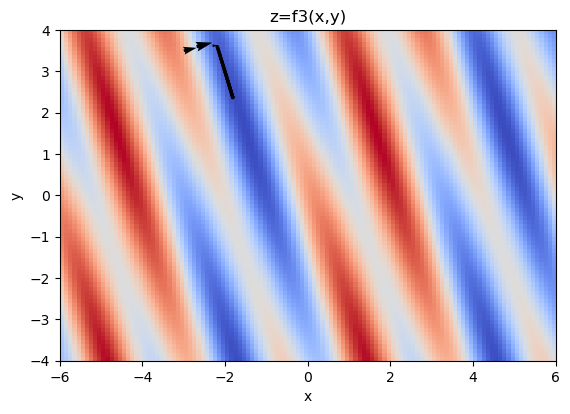

In [43]:
def ascentmin(x,y,dg,alpha,n):
  for i in range(n):
    ax.quiver(x,y,-alpha*dg(x,y)[0],-alpha*dg(x,y)[1],angles='xy',scale_units='xy', scale=1)
    x = -alpha * dg(x,y)[0]+x
    y = -alpha * dg(x,y)[1]+y
  return x,y

xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)

z=f3(x,y)

ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')

ascentmin(-3,3.5,df3,0.1,100)
ax.imshow(z, cmap='coolwarm', origin='lower', extent=(-6,6,-4,4))

## Optional (Programming)

Suppose we have only discreet values of our function.  Say it can only be evaluated at whole tenths of $x$ and $y$ (so (3.1,4) would work but (3.12,7) would not).  Can you reprogram gradient ascent to successfully approximate the necessary derivatives?

In [44]:
def g(x,y):
  if 10*x==floor(10*x) and 10*y==floor(10*y):
    return 16-x**2-y**4
  else:
    print("I can't evaluate the function here")
    return None
